# Summarization and EDA 

## Importing the Libraries, Package 

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

### Defining the functions 

In [10]:
def analysePerformanceData(dataf):
#     dataf['CurrentLoadDelinquencyStatus'].replace('R',-1,inplace=True)
#     dataf['CurrentLoadDelinquencyStatus'].replace('XX',-2,inplace=True)
    
# #     print(dataf.CurrentLoadDelinquencyStatus.unique())
       
#     dataf.CurrentLoadDelinquencyStatus=dataf.CurrentLoadDelinquencyStatus.astype(int)
    
    dlq=dataf.groupby('LoanSequenceNumber')['CurrentLoadDelinquencyStatus'].max()
    ir=dataf.groupby('LoanSequenceNumber')['CurrentInterestRate'].mean()
    loanDuration=dataf.groupby('LoanSequenceNumber')['LoanAge'].max()
    loss=dataf.groupby('LoanSequenceNumber')['ActualLossCalculation'].sum()
    UPBstart=dataf.groupby('LoanSequenceNumber')['CurrentActualUpb'].max()
    UPBend=dataf.groupby('LoanSequenceNumber')['CurrentActualUpb'].min()
    modCost=dataf.groupby('LoanSequenceNumber')['Modification Cost'].sum()
    remaininMonth=dataf.groupby('LoanSequenceNumber')['RemainingMonthsToLegalMaturity'].min()
    reportstart=dataf.groupby('LoanSequenceNumber')['MonthlyReportingPeriod'].min()
    reportend=dataf.groupby('LoanSequenceNumber')['MonthlyReportingPeriod'].max()
    zeroCode=dataf.groupby('LoanSequenceNumber')['ZeroBalanceCode'].max()
    
    
    summaryPerformance=pd.DataFrame({'LoanSequenceNumber':dlq.index,'DelinquencyCount':dlq.values,'InterestRate':ir.values,
                                    'ActualLossCalculation':loss.values,'loanDuration':loanDuration.values,
                                    'UPBstart':UPBstart.values,'UPBend':UPBend.values,'zeroCode':zeroCode.values,
                                    'RemainingMonthsToLegalMaturity':remaininMonth.values,'Modification Cost':modCost.values,
                                    'reportstart':reportstart.values,'reportend':reportend.values})
#     print(summaryPerformance.head())
    
    return summaryPerformance
#     DO not use ###################
#     if(dataf.LoanSequenceNumber == df.LoanSequenceNumber.shift()):
#         if(dataf.CurrentLoadDelinquencyStatus )
######################################
# ''' We have not taken in account of the below Columns : 
#     as we know Actual Loss = (Default UPB – Net Sale_Proceeds) + DelinquentAccrued Interest 
#                                                                - Expenses – MI Recoveries – Non MIRecoveries
#     ANd Delinquent Accrued Interest = (Default_Upb – Non Interestbearing UPB)* (Current Interest rate – 0.35) * 
#                                       ( Months betweenLast Principal & Interest paid to date and zero balance date ) *30/360/100
#     So We have all the DAta information realted to Loss that are included in the ActualLossCalculation Column. 
#     SO we are wontbe considering the below Columns:
    
#     Expenses = Sum(Legal Costs, Maintenance and Preservation Costs, Taxes and Insurance,MiscellaneousExpenses)
    
#     NetSalesProceeds
#     MiRecoveries
#     NonMiRecoveries
#     Legal Costs
#     Maintenance and Preservation Costs
#     Taxes and Insurance
#     MiscellaneousExpenses
    
#     WE are not accounting the information for the MonthlyReportingPeriod Column as we think
#     Starting date of Zero Balance Date is same data as that of ending MonthlyReportingPeriod , 
#     as when the loan ends and no records are kept after that
    
#     ZeroBalanceEffectiveDate
    
#     CurrentDeferredUpb - This is the Non-interest bearing UPB , which is used to caclulate DAI , and inturn the Actual Loss 
    
#     DueDateOfLastPaidInstallment - WE are already taking consideration by taking Column RemainingMonthsToLegalMaturity, 
#                                    in our case both represent the same entity
    
    
#     RepurchaseFlag - AS this will be indicated on the Zero FLag , how the Loan has ended by Code 6 
#     ModificationFlag - This is related to the mortgages with loan modifications,indicates that the loan has been modified 
#                        and it happens only when the loan has been repurchased , which have taken care of as mentioned before.
                
    

# '''


# ########3 Not working optimally #################       
#     for i,v in dataf.CurrentLoadDelinquencyStatus.iteritems():
#         if (i==0):
#             if(dataf['CurrentLoadDelinquencyStatus'][i] > 0):
#                 count=count+1
#             continue
#         if(dataf.LoanSequenceNumber[i]==dataf.LoanSequenceNumber[i-1]):
#             if(dataf['CurrentLoadDelinquencyStatus'][i] > 0):
#                 count=count+1
#         elif(dataf.LoanSequenceNumber[i]!=dataf.LoanSequenceNumber[i-1]):
#              dataf['DeliquencyCount'][i-1]=count
#     print(dataf.head(590))
######################################################
    
                        
        
        

### Call the defined function 

### We have not taken in account of the below Columns : 
<p>As we know Actual Loss = (Default UPB – Net Sale_Proceeds) + DelinquentAccrued Interest 
                                                              - Expenses – MI Recoveries – Non MIRecoveries</p>
<p> And Delinquent Accrued Interest = (Default_Upb – Non Interestbearing UPB)* 
                                                            (Current Interest rate – 0.35) *
                                                            ( Months between Last Principal & 
                                                              Interest paid to date and zero balance date ) *30/360/100</p>
<p>So We have all the DAta information related to Loss that are included in the Actual Loss Calculation Column. SO we are won't be considering the below Columns:</p>
    
<p>Expenses = Sum(Legal Costs, Maintenance and Preservation Costs, Taxes and                                                      Insurance,Miscellaneous Expenses)</p>
<p>    NetSalesProceeds</p>
<p>    MiRecoveries</p>
 <p>   NonMiRecoveries</p>
 <p>   Legal Costs</p>
 <p>   Maintenance and Preservation Costs</p>
 <p>   Taxes and Insurance</p>
<p>   MiscellaneousExpenses
    </p>
   


<p> WE are not accounting the information for the ZeroBalanceEffectiveDate Column as we saw
    Starting date of Zero Balance Effective Date is same data as that of ending   MonthlyReportingPeriod ,  as when the loan ends and no records are kept after that .</p>
    
 <p>   CurrentDeferredUpb - This is the Non-interest bearing UPB , which is used to caclulate DAI ,   and inturn the Actual Loss 
     DueDateOfLastPaidInstallment - WE are already taking consideration by taking Column RemainingMonthsToLegalMaturity, in our case both represent the same entity</p>
  <p>  RepurchaseFlag - AS this will be indicated on the Zero FLag , how the Loan has ended by Code 6 </p>
   <p> ModificationFlag - This is related to the mortgages with loan modifications,indicates that the loan has been modified and it happens only when the loan has been repurchased , which have taken care of as mentioned before.
    </p>

In [15]:
fileDir=os.path.dirname(os.path.realpath('__file__'))
print("Current Directory : "+str(fileDir))
syears = [syear for syear in os.listdir(fileDir+'/adsDataRepo/')]
print("Number of Files Present in the adsDataRepo"+str(len(syears)))
temp=[]
tempscore={'mean':[],"min":[],"max":[]}

frametempFico=[]

 
frames=[]
data200789=[]
count=0
for syear in syears:
        ## Checking only the files we want , have to discard .ipynb files 
        
    if('Sample'in syear):
          print("#####################################################3")
          print(syear)
          print("Original File ") 
          originalf = pd.read_csv(fileDir+"/adsDataRepo/"+syear+"/Original_Clean_"+syear+".csv",low_memory=False)
          print("Imported CSV")
          if("2007" in syear):
            print("Hello"+syear)
            data200789.append(originalf)
          if("2008" in syear):
            print("Hello"+syear)
            data200789.append(originalf)
          if("2009" in syear):
            print("Hello"+syear)
            data200789.append(originalf)
          
          temp.append(originalf['CreditScore'])
          tempscore['mean'].append(originalf['CreditScore'].mean())
          tempscore['min'].append(originalf['CreditScore'].min())
          tempscore['max'].append(originalf['CreditScore'].max())
        
        ## Binning the data according to the FICO Score 
          bins = [300,580, 670, 740, 800,900]
          group_names = ['POOR','BLW', 'MED', 'VG', 'EXL']
          originalf['FicoScore'] = pd.cut(originalf['CreditScore'], bins, labels=group_names)
#           for i in originalf['Year']:
#                 print(str(i)[:-2]+" "+str(i)[-2:])

          originalf['Year']=originalf['FirstPaymentDate']/100
          originalf['Year']=originalf['Year'].astype(int)
          originalf['Month']=originalf['FirstPaymentDate']%100
          originalf['Quarter']=pd.to_datetime(originalf['Month'],format= '%m')
          originalf['Quarter']=originalf['Quarter'].dt.quarter
        
          
          
#           fico= originalf.groupby('Year')['FicoScore'].sum()
          frametempFico.append(originalf)
          
          print("-------------------------------------------------------------------------------")
          print("Performance File ") 
          var1 = syear[-4:]
          ## Reading the file 
          performancef = pd.read_csv(fileDir+"/adsDataRepo/"+syear+"/Performance_Clean_"+syear+".csv",low_memory=False)
            # Passing the file to take the important parameters 
          data2 = analysePerformanceData(performancef)
           # Evaluating the  Data reduced % 
          data2['Year']=var1
          len1 = float(len(performancef)-len(data2))
          len2 = float(len(performancef))
          result = len1/len2*100
          print("Compressing the Performance Dataset by "+str(result)+"%")
          frames.append(data2)
           
print("End of Summarising ")

Current Directory : C:\Users\Tridiv
Number of Files Present in the adsDataRepo16
#####################################################3
Sample_data_2005
Original File 
Imported CSV
-------------------------------------------------------------------------------
Performance File 
Compressing the Performance Dataset by 98.6010485631%
#####################################################3
Sample_data_2006
Original File 
Imported CSV
-------------------------------------------------------------------------------
Performance File 
Compressing the Performance Dataset by 98.2795387373%
#####################################################3
Sample_data_2007
Original File 
Imported CSV
HelloSample_data_2007
-------------------------------------------------------------------------------
Performance File 
Compressing the Performance Dataset by 98.1393015421%
#####################################################3
Sample_data_2008
Original File 
Imported CSV
HelloSample_data_2008
-------------------

## Interest Rate - Quarterly Distribution - 2007-2008-2009

In [16]:
origdata789 = pd.concat(data200789)

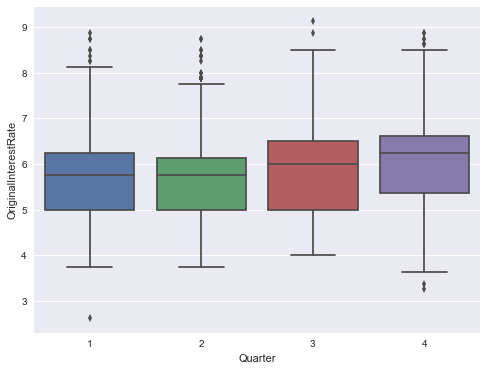

In [17]:
data = pd.concat([origdata789['Quarter'], origdata789['OriginalInterestRate']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Quarter', y="OriginalInterestRate", data=data)
fig.axis()
plt.show()

## Total Number of Loan SActioned - Quarterly 2007-2008-2009

In [18]:
origdata789.groupby('Quarter')['LoanSequenceNumber'].count()

Quarter
1    34768
2    40731
3    38998
4    35503
Name: LoanSequenceNumber, dtype: int64

## First Time Buyer - Quartely 

In [19]:
origdata789.groupby(['Quarter','FirstTimeHomeBuyerFlag'])['LoanSequenceNumber'].count()

Quarter  FirstTimeHomeBuyerFlag
1        N                         28490
         Y                          6278
2        N                         34709
         Y                          6022
3        N                         32249
         Y                          6749
4        N                         28371
         Y                          7132
Name: LoanSequenceNumber, dtype: int64

## Quartely Channel of Mortgage Loans Sanctioned 
<p>R = Retail</p>
<p>B = Broker</p>
<p>C = Correspondent</p>
<p>T = TPO Not Specified</p>


In [20]:
ax=origdata789.groupby(['Quarter','Channel'])['LoanSequenceNumber'].count().reset_index(name="Count")

In [21]:
frames1=[]
tempdic={"B":[]}
tempdic2={"C":[]}
tempdic3={"R":[]}
tempdic4={"T":[]}

for i,v in ax.Count.iteritems():
            if(ax.Channel[i]=='B'):
                tempdic["B"].append(ax['Count'][i])
            elif(ax.Channel[i]=='C'):
                tempdic2["C"].append(ax['Count'][i])
            elif(ax.Channel[i]=='R'):
                tempdic3["R"].append(ax['Count'][i])
            elif(ax.Channel[i]=='T'):
                tempdic4["T"].append(ax['Count'][i])
tempdicdf=pd.DataFrame(tempdic)
tempdicdf2=pd.DataFrame(tempdic2)
tempdicdf3=pd.DataFrame(tempdic3)
tempdicdf4=pd.DataFrame(tempdic4)

In [22]:
a=pd.DataFrame({'B':tempdicdf['B'],"C":tempdicdf2["C"],"R":tempdicdf3["R"],"T":tempdicdf4["T"]})
a.index=['Q1','Q2','Q3','Q4']

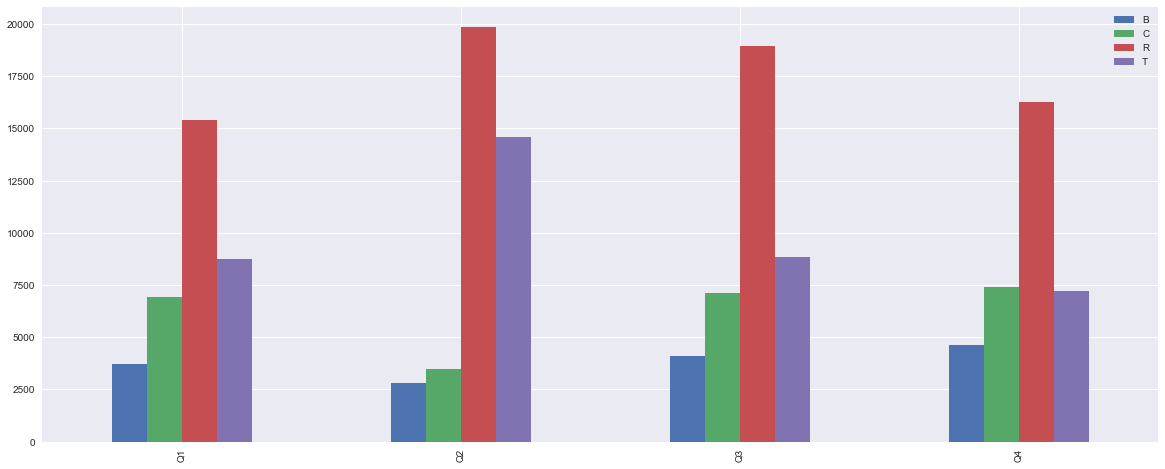

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)
a.plot.bar();
plt.show()

In [24]:
fico = pd.concat(frametempFico)

## Summary of the Different Type of Loan Purpose 

In [25]:
fico.columns

Index([u'Unnamed: 0', u'CreditScore', u'FirstPaymentDate',
       u'FirstTimeHomeBuyerFlag', u'MaturityDate', u'MSA', u'MIP',
       u'NumberOfUnits', u'OccupancyStatus', u'OCLTV', u'DTI', u'OriginalUPB',
       u'OLTV', u'OriginalInterestRate', u'Channel', u'PrepaymentPenaltyFlag',
       u'ProductType', u'PropertyState', u'PropertyType', u'PostalCode',
       u'LoanSequenceNumber', u'LoanPurpose', u'OriginalLoanTerm',
       u'NumberOfBorrowers', u'SellerName', u'ServicerName',
       u'SuperConformingFlag', u'FicoScore', u'Year', u'Month', u'Quarter'],
      dtype='object')

In [26]:
zone = pd.DataFrame({"PostalCode":fico['PostalCode'],"State":fico['PropertyState'],"LoanSeqNo":fico['LoanSequenceNumber']})

In [27]:
groupedZone = zone.groupby('State')['LoanSeqNo'].count()
groupZdf = pd.DataFrame(groupedZone)
groupZdf.sort_values(by="LoanSeqNo",ascending=False).head()

,LoanSeqNo
State,
CA,71933
TX,33737
IL,30620
FL,28641
NY,20806


In [28]:
groupZdf['LoanSeqNo']=groupZdf['LoanSeqNo'].astype(float)

In [29]:
# !pip install plotly

In [30]:
import plotly 
plotly.tools.set_credentials_file(username='maiti.t', api_key='elAkJU6TNeOR4Qcx3Wfd')

In [31]:
import plotly.plotly as py
import pandas as pd

# scl = [[0, 'zmin'],[20000, 'zmin'],[30000, 'zmin'],
#             [40000, 'zmin'],[50000, 'zmin'],[100000, 'zmin']]
data = [ dict(
        type='choropleth',
        colorscale = 'Jet',
        reversescale='True',
        locations = groupZdf.index,
        z = groupZdf['LoanSeqNo'],
        locationmode = 'USA-states',
#         text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(title = 'Freedie Mac - Mortagage Loan distribution - 2005 -2016',
              geo = dict(scope='usa',projection=dict( type='albers usa' )))
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [32]:
groupZdf.columns

Index([u'LoanSeqNo'], dtype='object')

In [33]:
### ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME (DTI) RATIO -
### in  Time Series 

In [34]:
fico['DTI'].replace('',0,inplace=True)
fico['DTI'].replace('   ',0,inplace=True)
fico['DTI']=fico['DTI'].astype(int)

In [35]:
dc= fico.groupby('Year')['OCLTV'].mean()
dco= fico.groupby('Year')['OLTV'].mean()
dcdti= fico.groupby('Year')['DTI'].mean()
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=500,height=500)
p.line(dc.index,dc.values,color="red",alpha=0.5,line_width=2,legend="OCLTV")
p.line(dco.index,dco.values,color="orange",alpha=0.5,line_width=2,legend="OLTV")
p.line(dcdti.index,dcdti.values,color="blue",alpha=0.5,line_width=2,legend="DTI")
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage OCLTV, OLTV,DTI "

output_notebook()
show(p)

Loading BokehJS ...

## Summary according to the Property Type 
<p> CO = Condo</p>
<p> LH = Leasehold</p>
<p>PU = PUD</p>
<p> MH = Manufactured Housing</p>
<p>SF = 1-4 Fee Simple</p>
<p> CP = Co-op</p>


In [36]:
fico.groupby('PropertyType').describe()

CreditScore                                                      \
                   count        mean        std    min     25%    50%    75%   
PropertyType                                                                   
CO               38706.0  753.320596  47.552932  300.0  724.00  765.0  791.0   
CP                1440.0  750.086806  49.169716  300.0  718.00  762.5  790.0   
LH                 298.0  741.604027  50.928327  588.0  705.25  749.0  785.0   
MH                3496.0  730.398455  56.668910  540.0  689.00  738.0  779.0   
PU              117198.0  754.269117  46.007826  300.0  725.00  766.0  790.0   
SF              413862.0  745.865206  51.065401  300.0  712.00  758.0  787.0   

                          DTI              ...   Unnamed: 0           \
                max     count       mean   ...          75%      max   
PropertyType                               ...                         
CO            842.0   38706.0  34.429339   ...     36539.50  49997.0   
CP            826.0    1440.0  31.713889   ...     38020.50  49994.0   
LH            823.0     298.0  33.486577   ...     37397.25  49803.0   
MH            832.0    3496.0  34.816648   ...     36603.25  49984.0   
PU            840.0  117198.0  33.563781   ...     36959.00  49999.0   
SF            850.0  413862.0  33.324019   ...     36952.00  49999.0   

                  Year                                                         \
                 count         mean       std     min     25%     50%     75%   
PropertyType                                                                    
CO             38706.0  2010.339456  3.514448  2005.0  2007.0  2010.0  2014.0   
CP              1440.0  2009.358333  3.243757  2005.0  2007.0  2008.0  2012.0   
LH               298.0  2010.711409  3.438337  2005.0  2008.0  2011.0  2014.0   
MH              3496.0  2008.159611  3.133690  2005.0  2006.0  2007.0  2010.0   
PU            117198.0  2011.242675  3.217285  2005.0  2009.0  2012.0  2014.0   
SF            413862.0  2010.219206  3.308896  2005.0  2007.0  2010.0  2013.0   

                      
                 max  
PropertyType          
CO            2016.0  
CP            2016.0  
LH            2016.0  
MH            2016.0  
PU            2017.0  
SF            2017.0  

[6 rows x 136 columns]

In [37]:
lp = fico.groupby(['Year','LoanPurpose'])['LoanSequenceNumber'].count().reset_index(name='Count')
lp.index=lp.Year
del lp['Year']

## Count Varinace of Different Types of the Loan Purpose 

<p>P = Purchase</p>
<p>C = Cash-outRefinance</p>
<p>N = No Cash-outRefinance</p>

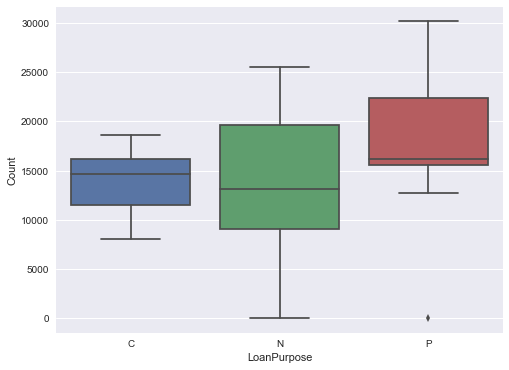

In [38]:
data = pd.concat([lp['LoanPurpose'], lp['Count']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='LoanPurpose', y="Count", data=data)
fig.axis()
plt.show()

In [39]:
fico2 = fico.groupby(['Year','FicoScore'])['LoanSequenceNumber'].count().reset_index(name='Count')

### Converting the Dataframe to Plot 

In [40]:
frames1=[]
tempdic={"BLW":[]}
tempdic2={"EXL":[]}
tempdic3={"MED":[]}
tempdic4={"POOR":[]}
tempdic5={"VG":[]}


count=1
blwflag=True
exlflag=True
medflag=True
poorflag=True
vgflag=True
for i,v in fico2.Count.iteritems():
    try:
        if(fico2.Year[i]==fico2.Year[i+1]):
            if(fico2.FicoScore[i]=='BLW'):
                tempdic["BLW"].append(fico2['Count'][i])
                blwflag=False
            elif(fico2.FicoScore[i]=='EXL'):
                tempdic2["EXL"].append(fico2['Count'][i])
                exlflag=False
            elif(fico2.FicoScore[i]=='MED'):
                tempdic3["MED"].append(fico2['Count'][i])
                medflag=False
            elif(fico2.FicoScore[i]=='POOR'):
                tempdic4["POOR"].append(fico2['Count'][i])
                poorflag=False
            elif(fico2.FicoScore[i]=='VG'):
                tempdic5["VG"].append(fico2['Count'][i])
                vgflag=False

        elif(fico2.Year[i]!=fico2.Year[i+1]):
            if(fico2.FicoScore[i]=='BLW'):
                tempdic["BLW"].append(fico2['Count'][i])
                blwflag=False
            elif(fico2.FicoScore[i]=='EXL'):
                tempdic2["EXL"].append(fico2['Count'][i])
                exlflag=False
            elif(fico2.FicoScore[i]=='MED'):
                tempdic3["MED"].append(fico2['Count'][i])
                medflag=False
            elif(fico2.FicoScore[i]=='POOR'):
                tempdic4["POOR"].append(fico2['Count'][i])
                poorflag=False
            elif(fico2.FicoScore[i]=='VG'):
                tempdic5["VG"].append(fico2['Count'][i])
                vgflag=False
            
            if(blwflag):
                tempdic["BLW"].append(0)
            if(exlflag):
                tempdic2["EXL"].append(0)
            if(medflag):
                tempdic3["MED"].append(0)
            if(poorflag):
                tempdic4["POOR"].append(0)
            if(vgflag):
                tempdic5["VG"].append(0)


        elif(i==58):
                if(fico2.FicoScore[i]=='BLW'):
                    tempdic["BLW"].append(fico2['Count'][i])
                    blwflag=False
                elif(fico2.FicoScore[i]=='EXL'):
                    tempdic2["EXL"].append(fico2['Count'][i])
                    exlflag=False
                elif(fico2.FicoScore[i]=='MED'):
                    tempdic3["MED"].append(fico2['Count'][i])
                    medflag=False
                elif(fico2.FicoScore[i]=='POOR'):
                    tempdic4["POOR"].append(fico2['Count'][i])
                    poorflag=False
                elif(fico2.FicoScore[i]=='VG'):
                    tempdic5["VG"].append(fico2['Count'][i])
                    vgflag=False


                if(blwflag):
                    tempdic["BLW"].append("0")
                if(exlflag):
                    tempdic2["EXL"].append("0")
                if(medflag):
                    tempdic3["MED"].append(0)
                if(poorflag):
                    tempdic4["POOR"].append("0")
                if(vgflag):
                    tempdic5["VG"].append("0")
    except:
        print("")
#         countdf = pd.DataFrame(tempdic)
#         print(countdf)
#         frames1.append(countdf)
#         tempdic=[]
       
    
        
    

In [41]:
tempdicdf=pd.DataFrame(tempdic)
tempdicdf2=pd.DataFrame(tempdic2)
tempdicdf3=pd.DataFrame(tempdic3)
tempdicdf4=pd.DataFrame(tempdic4)
tempdicdf5=pd.DataFrame(tempdic5)

In [42]:
a= pd.DataFrame({'BLW':tempdicdf.BLW,"EXL":tempdicdf2.EXL,"MED":tempdicdf3.MED,"POOR":tempdicdf4.POOR,"VG":tempdicdf5.VG})
a.index=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

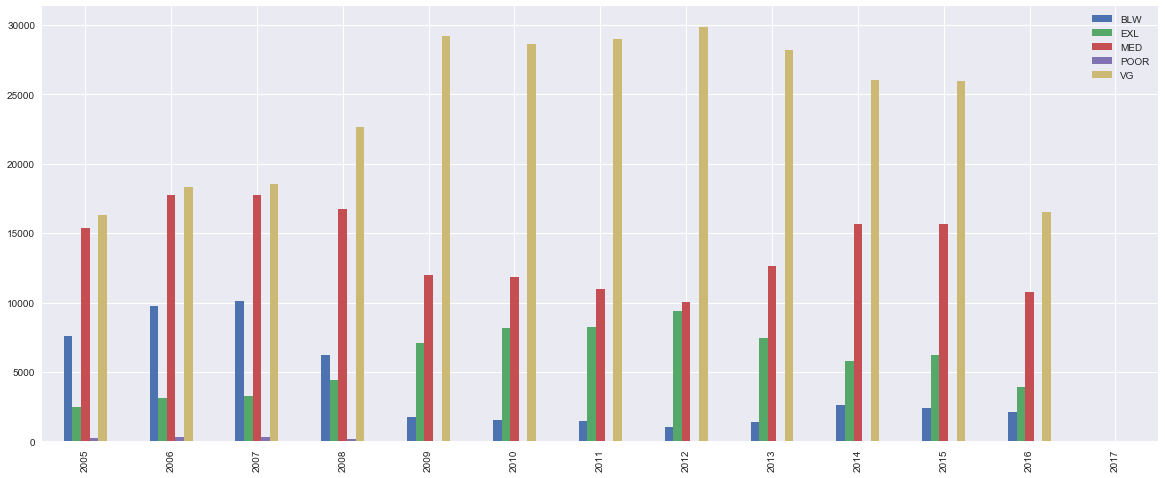

In [43]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)
a.plot.bar();
plt.show()

In [44]:
fico1 = fico.groupby('ServicerName').count()

In [45]:
fico1= fico1.sort_values(by='Year',ascending=False)

In [46]:
df2=pd.DataFrame({'ServiceName':fico1.index,'Count':fico1.Year})

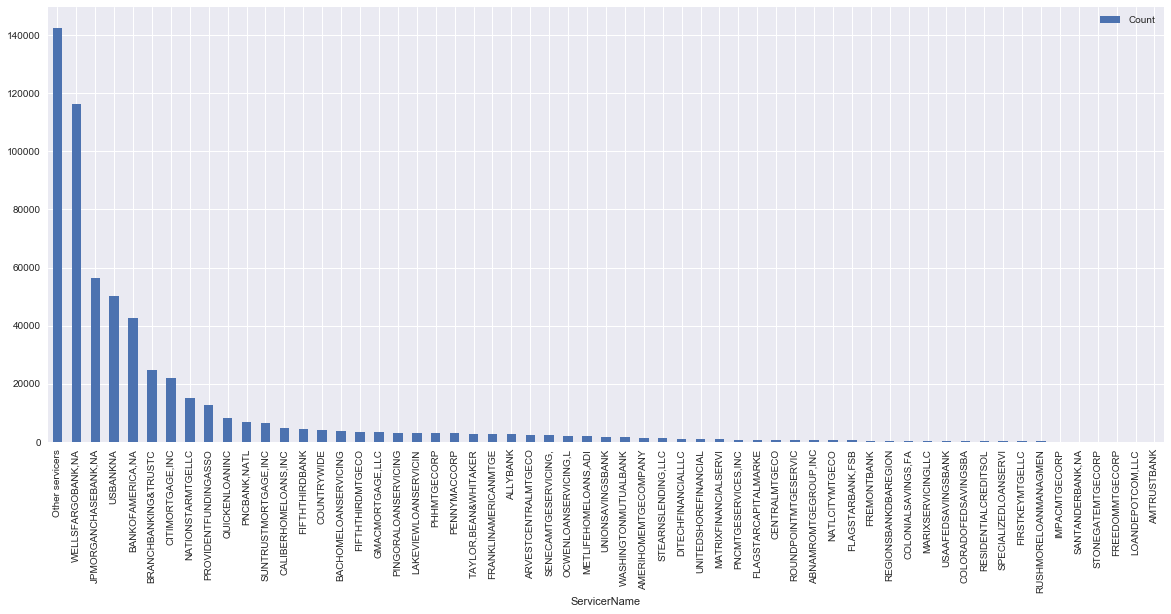

In [47]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)
df2.plot.bar();
plt.show()

In [48]:
fico['LoanSequenceNumber'].describe()

count           575000
unique          575000
top       F108Q3089705
freq                 1
Name: LoanSequenceNumber, dtype: object

## Summary of Original data 

### 1. Plot of Credit Score variance with the Time Series 

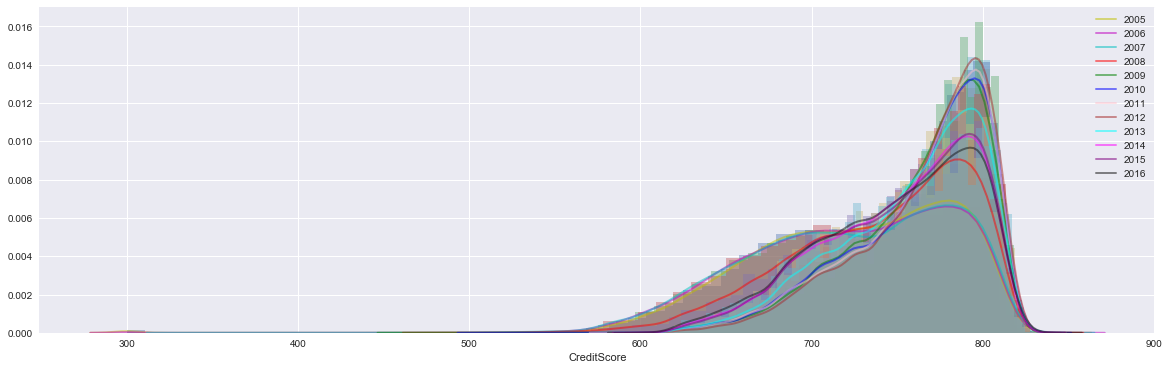

In [49]:
plt.figure(figsize=(20, 6))
sns.distplot(temp[0],kde_kws={"label":"2005","alpha":0.5,"lw": 2,"color":"y"});
sns.distplot(temp[1],kde_kws={"label":"2006","alpha":0.5,"lw": 2,"color":"m"});
sns.distplot(temp[2],kde_kws={"label":"2007","alpha":0.5,"lw": 2,"color":"c"});
sns.distplot(temp[3],kde_kws={"label":"2008","alpha":0.5,"lw": 2,"color":"r"});
sns.distplot(temp[4],kde_kws={"label":"2009","alpha":0.5,"lw": 2,"color":"g"});
sns.distplot(temp[5],kde_kws={"label":"2010","alpha":0.5,"lw": 2,"color":"b"});
sns.distplot(temp[6],kde_kws={"label":"2011","alpha":0.5,"lw": 2,"color":"pink"});
sns.distplot(temp[7],kde_kws={"label":"2012","alpha":0.5,"lw": 2,"color":"brown"});
sns.distplot(temp[8],kde_kws={"label":"2013","alpha":0.5,"lw": 2,"color":"cyan"});
sns.distplot(temp[9],kde_kws={"label":"2014","alpha":0.5,"lw": 2,"color":"magenta"});
sns.distplot(temp[10],kde_kws={"label":"2015","alpha":0.5,"lw": 2,"color":"purple"});
sns.distplot(temp[11],kde_kws={"label":"2016","alpha":0.5,"lw": 2,"color":"#111111"});

plt.show()
plt.savefig(os.path.join(fileDir, 'adsDataRepo/CreditScoreVariance.png'))

# Summary of Performance Data

In [50]:
tempPerformance=pd.concat(frames)

In [51]:
tempPerformance.head()

,ActualLossCalculation,DelinquencyCount,InterestRate,LoanSequenceNumber,Modification Cost,RemainingMonthsToLegalMaturity,UPBend,UPBstart,loanDuration,reportend,reportstart,zeroCode,Year
0,0.0,0,5.750,F105Q1000064,0.0,303,0.0,62000.0,57,200912,200503,1,2005
1,0.0,0,5.250,F105Q1000076,0.0,291,0.0,197000.0,69,201011,200502,1,2005
2,0.0,1,5.750,F105Q1000087,0.0,342,0.0,100000.0,18,200609,200503,1,2005
3,0.0,0,5.875,F105Q1000130,0.0,255,0.0,334000.0,105,201311,200502,1,2005
4,0.0,0,5.875,F105Q1000195,0.0,279,0.0,125000.0,81,201111,200502,1,2005


In [52]:
tempPerformance['ActualLossCalculation'].describe()

count    574957.000000
mean      -1908.695969
std       15917.131818
min     -525560.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      112666.000000
Name: ActualLossCalculation, dtype: float64

In [53]:
dc= tempPerformance.groupby('Year')['ActualLossCalculation'].sum()

In [54]:
dc

Year
2005   -198987693.0
2006   -351739311.0
2007   -363946504.0
2008   -158280959.0
2009    -15105252.0
2010     -5384565.0
2011     -2364418.0
2012      -819042.0
2013      -434444.0
2014      -303867.0
2015       -52053.0
2016            0.0
Name: ActualLossCalculation, dtype: float64

In [55]:
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=500,height=500)
p.line(dc.index,dc.values,color="red",alpha=0.5,line_width=2)
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage Actual Loss  "
output_notebook()
show(p)

Loading BokehJS ...

## Loan Duration with Time Series 

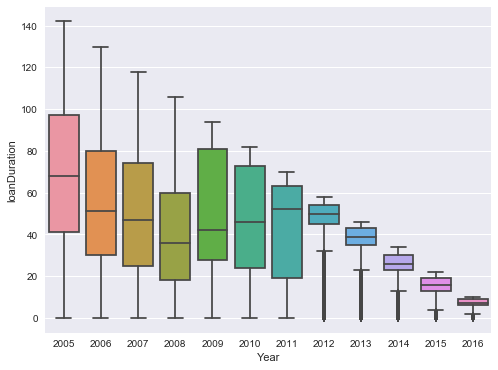

In [56]:
data = pd.concat([tempPerformance['loanDuration'], tempPerformance['Year']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y="loanDuration", data=data)
fig.axis()
plt.show()

In [57]:
tempPerformance.DelinquencyCount.unique()

array([  0,   1,   4,   7,   2,  14,   3,   5,  16,  19,  15,  11,  10,
        31,  18,   8,   6,  13,  35,  12,  24,  21,  22,  60,  17,  30,
        54,  23,  28,   9,  49,  26,  32,  40,  25,  92,  34,  42,  20,
        37,  68,  33,  41,  36,  27,  82,  46,  55,  29,  86,  45,  62,
        51,  44,  47,  53,  98,  59,  70,  80,  48,  50,  43,  57,  38,
        74,  67,  63,  61,  66,  87,  52,  69,  64,  88,  84,  81,  39,
        72,  56,  73,  58,  65,  89,  96,  75, 100, 122,  77,  93,  71,
        76,  78,  79,  90,  99,  97, 105,  94,  91,  83,  95,  85, 104], dtype=int64)

## Loan Average Loan AMount in TIme Series Variance 

In [58]:
dc= tempPerformance.groupby('Year')['UPBstart'].mean()

In [59]:
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=500,height=500)
p.line(dc.index,dc.values,color="red",alpha=0.5,line_width=2)
 
 
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage Average Loan AMount  "
output_notebook()
show(p)

Loading BokehJS ...

## Interest Delinquency Count VS Time Series 

In [60]:
tempPerformance.DelinquencyCount = tempPerformance.DelinquencyCount.map(lambda x: 1 if x > 0 else 0 )

In [61]:
dc= tempPerformance.groupby('Year')['DelinquencyCount'].sum()
di= tempPerformance.groupby('Year')['InterestRate'].mean()

In [62]:
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=500,height=500)
p.line(dc.index,dc.values,color="red",alpha=0.5,line_width=2,legend="Delinquency Count")
p.line(di.index,di.values*1000,color="blue",alpha=0.5,line_width=2,legend="Interest Rate")
# p.line(a["DATE"],a["HOURLYDewPointTempC"],color="Green",alpha=0.5)
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage Delinquency Count and Interest Rate  "
output_notebook()
show(p)

Loading BokehJS ...

## Interest Rate Variance - TIme Series 

In [ ]:
framesInsight2 = []
d2= tempPerformance.groupby('Year')['DelinquencyCount'].sum()
InterestInsight=pd.DataFrame({'Year':d2.index,'Min Interest':d2.values,'Mean Interest':d1.values,'Max Interest':d3.values})
InterestInsight

In [337]:
framesInsight1 = []
d2= tempPerformance.groupby('Year')['InterestRate'].min()
d1= tempPerformance.groupby('Year')['InterestRate'].mean()
d3= tempPerformance.groupby('Year')['InterestRate'].max()
InterestInsight=pd.DataFrame({'Year':d2.index,'Min Interest':d2.values,'Mean Interest':d1.values,'Max Interest':d3.values})
InterestInsight

,Max Interest,Mean Interest,Min Interest,Year
0,9.990000,5.775855,2.822785,2005
1,9.053191,6.345243,3.258427,2006
2,8.875000,6.292827,3.173333,2007
3,8.750000,6.008554,2.625000,2008
4,7.625000,4.957200,3.456731,2009
5,6.750000,4.636704,2.625000,2010
6,6.750000,4.347383,2.750000,2011
7,5.750000,3.609068,2.250000,2012
8,6.250000,3.848011,2.250000,2013
9,5.750000,4.287854,2.625000,2014


In [348]:
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=500,height=500)
p.line(InterestInsight["Year"],InterestInsight["Min Interest"],color="red",alpha=0.5,line_width=2)
p.line(InterestInsight["Year"],InterestInsight["Mean Interest"],color="blue",alpha=0.5,line_width=2)
p.line(InterestInsight["Year"],InterestInsight["Max Interest"],color="green",alpha=0.5,line_width=2)
# p.line(a["DATE"],a["HOURLYDewPointTempC"],color="Green",alpha=0.5)
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage Interest Rate"
output_notebook()
show(p)

Loading BokehJS ...

In [350]:
mi = InterestInsight['Min Interest']-InterestInsight['Min Interest'].shift()
ma = InterestInsight['Max Interest']-InterestInsight['Max Interest'].shift()
me = InterestInsight['Mean Interest']-InterestInsight['Mean Interest'].shift()
InterestInsightPercentage=pd.DataFrame({'Year':InterestInsight['Year'],'Min Interest % Change':mi.values,
                                        'Mean Interest % Change':me.values,'Max Interest % Change':ma.values})
InterestInsightPercentage.fillna(0,inplace=True)

In [351]:
InterestInsightPercentage

,Max Interest % Change,Mean Interest % Change,Min Interest % Change,Year
0,0.000000,0.000000,0.000000,2005
1,-0.936809,0.569388,0.435642,2006
2,-0.178191,-0.052416,-0.085094,2007
3,-0.125000,-0.284273,-0.548333,2008
4,-1.125000,-1.051354,0.831731,2009
5,-0.875000,-0.320496,-0.831731,2010
6,0.000000,-0.289321,0.125000,2011
7,-1.000000,-0.738316,-0.500000,2012
8,0.500000,0.238944,0.000000,2013
9,-0.500000,0.439843,0.375000,2014


In [354]:
from bokeh.io import output_notebook
from bokeh.plotting  import figure,show
p=figure(width=800,height=500)
p.line(InterestInsightPercentage["Year"],InterestInsightPercentage["Min Interest % Change"],color="red",alpha=0.5,line_width=2)
p.line(InterestInsightPercentage["Year"],InterestInsightPercentage["Mean Interest % Change"],color="blue",alpha=0.5,line_width=2)
p.line(InterestInsightPercentage["Year"],InterestInsightPercentage["Max Interest % Change"],color="green",alpha=0.5,line_width=2)
# p.line(a["DATE"],a["HOURLYDewPointTempC"],color="Green",alpha=0.5)
p.xaxis.axis_label="TimeLine"
p.yaxis.axis_label="Mortagage Interest Rate"
output_notebook()
show(p)

Loading BokehJS ...

In [247]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
tempmean=pd.DataFrame(tempscore)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
tempmean.plot(table=True)
plt.show()



TypeError: Empty 'DataFrame': no numeric data to plot

In [146]:
##Binning of the credit Score 

In [140]:
###Dropped this way of caluclating as it was taking too much time ....
# for i,v in originalf.CreditScore.iteritems():
#     if (originalf['CreditScore'][i]>800):
#          originalf['FicoScore'][i]='EXL'

C:\Users\Tridiv\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
